In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Assignment03

/content/drive/MyDrive/Assignment03


In [3]:
!ls

Assignment.ipynb  Images  table-transformer-detection


In [4]:
!pip install transformers datasets torch torchvision Pillow

In [5]:
# Importing necessary libraries
from transformers import TableTransformerForObjectDetection, DetrImageProcessor
from PIL import Image
import torch
import os
import pandas as pd

# Path to the folder containing images
image_folder = 'Images'

# Check available images
images = os.listdir(image_folder)
print(f"Images in folder: {images}")

Images in folder: ['00bb7f8f05c53d3e4e1ee3f332278707-177.png', '00c0c202e8d3b133dae5f1e4a7137deb-42.png', '000f8315c3bea30fb7ae99f925286343-15.png', '001e626d00966d0268d44ce686e8559b-62.png', '001e626d00966d0268d44ce686e8559b-118.png', '004f4586092af34f31313224ab19c50c-4.png', '005608f2ffa46e92e672f0083b6037c4-38.png', '0081e7fd154bb0319f96ac0c6127da1a-118.png', '0079611b26cefff735f1d98a932e8b7d-1.png', '0005ab896e95c5de6885bbf595500a8e-66.png']


In [6]:
!git clone https://huggingface.co/microsoft/table-transformer-detection

fatal: destination path 'table-transformer-detection' already exists and is not an empty directory.


In [7]:
!pip install timm

In [8]:
# Load the Table Transformer detection model from Hugging Face
detection_model = TableTransformerForObjectDetection.from_pretrained('microsoft/table-transformer-detection')
processor = DetrImageProcessor.from_pretrained('microsoft/table-transformer-detection')

# Set the model to evaluation mode
detection_model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


TableTransformerForObjectDetection(
  (model): TableTransformerModel(
    (backbone): TableTransformerConvModel(
      (conv_encoder): TableTransformerConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): TableTransformerFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): BasicBlock(
              (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn1): TableTransformerFrozenBatchNorm2d()
              (drop_block): Identity()
              (act1): ReLU(inplace=True)
              (aa): Identity()
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): TableTransformerFrozenBatchNorm2d()
              (act2): ReLU(inplac

In [9]:
# Load and preprocess the image
image_path = os.path.join(image_folder, images[0])  # Select the first image for testing
image = Image.open(image_path)

# Preprocess image for the model
inputs = processor(images=image, return_tensors="pt")

# Perform inference and extract table boundaries
with torch.no_grad():
    outputs = detection_model(**inputs)

# Post-process to obtain detected tables
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

# Filter out low-confidence detections
threshold = 0.9
table_boxes = [box for score, box in zip(results['scores'], results['boxes']) if score > threshold]
print(f"Detected {len(table_boxes)} table regions.")

Detected 1 table regions.


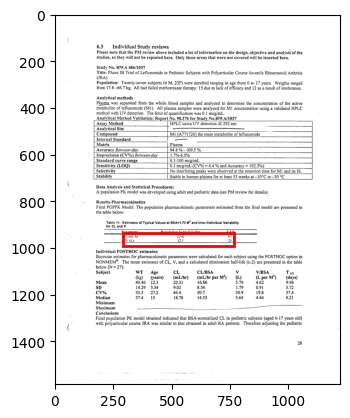

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Visualize the detected table regions on the image
fig, ax = plt.subplots(1)
ax.imshow(image)

for box in table_boxes:
    x, y, w, h = box
    rect = patches.Rectangle((x, y), w - x, h - y, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

In [11]:
!git clone https://huggingface.co/microsoft/table-transformer-structure-recognition

Cloning into 'table-transformer-structure-recognition'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40 (from 1)
Unpacking objects: 100% (40/40), 30.75 KiB | 32.00 KiB/s, done.
Filtering content: 100% (2/2), 220.25 MiB | 31.61 MiB/s, done.
fatal: cannot exec '/content/drive/MyDrive/Assignment03/table-transformer-structure-recognition/.git/hooks/post-checkout': Permission denied


In [12]:
# Load the Table Transformer structure recognition model
structure_model = TableTransformerForObjectDetection.from_pretrained('microsoft/table-transformer-structure-recognition')
processor_structure = DetrImageProcessor.from_pretrained('microsoft/table-transformer-structure-recognition')

# Set the structure model to evaluation mode
structure_model.eval()

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

TableTransformerForObjectDetection(
  (model): TableTransformerModel(
    (backbone): TableTransformerConvModel(
      (conv_encoder): TableTransformerConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): TableTransformerFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): BasicBlock(
              (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn1): TableTransformerFrozenBatchNorm2d()
              (drop_block): Identity()
              (act1): ReLU(inplace=True)
              (aa): Identity()
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): TableTransformerFrozenBatchNorm2d()
              (act2): ReLU(inplac

In [14]:
# Process the detected table region
table_box = table_boxes[0].int()
cropped_image = image.crop((table_box[0].item(), table_box[1].item(), table_box[2].item(), table_box[3].item()))

# Preprocess cropped image for structure recognition
inputs_structure = processor_structure(images=cropped_image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs_structure = structure_model(**inputs_structure)

# Post-process to extract rows and columns
results_structure = processor_structure.post_process_object_detection(outputs_structure, target_sizes=target_sizes)[0]
table_elements = results_structure['boxes']
print(f"Detected {len(table_elements)} elements in the table (rows/columns).")

Detected 10 elements in the table (rows/columns).


In [15]:
# Create a pandas DataFrame to store the table structure
table_data = []

# Assume each row/column is detected
for i, box in enumerate(table_elements):
    x, y, w, h = box
    table_data.append([x, y, w, h])

# Convert list to DataFrame and save as CSV
df = pd.DataFrame(table_data, columns=['x', 'y', 'width', 'height'])
df.to_csv('detected_table.csv', index=False)
print("Table structure saved to 'detected_table.csv'.")

Table structure saved to 'detected_table.csv'.


In [21]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [22]:
# Define a function to load all images from the folder
def load_images(image_folder):
    images = []
    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)
        images.append(Image.open(img_path))
    return images

# Load images in batch
image_batch = load_images(image_folder)

In [23]:
# Load detection and structure recognition models to the device
detection_model = TableTransformerForObjectDetection.from_pretrained('microsoft/table-transformer-detection').to(device)
processor = DetrImageProcessor.from_pretrained('microsoft/table-transformer-detection')

structure_model = TableTransformerForObjectDetection.from_pretrained('microsoft/table-transformer-structure-recognition').to(device)
processor_structure = DetrImageProcessor.from_pretrained('microsoft/table-transformer-structure-recognition')

# Set both models to evaluation mode
detection_model.eval()
structure_model.eval()

Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when init

TableTransformerForObjectDetection(
  (model): TableTransformerModel(
    (backbone): TableTransformerConvModel(
      (conv_encoder): TableTransformerConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): TableTransformerFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): BasicBlock(
              (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn1): TableTransformerFrozenBatchNorm2d()
              (drop_block): Identity()
              (act1): ReLU(inplace=True)
              (aa): Identity()
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): TableTransformerFrozenBatchNorm2d()
              (act2): ReLU(inplac

In [24]:
# Preprocess a batch of images for detection
inputs = processor(images=image_batch, return_tensors="pt").to(device)

# Perform table detection on the batch
with torch.no_grad():
    outputs = detection_model(**inputs)

# Post-process results (extract tables)
target_sizes = torch.tensor([image.size[::-1] for image in image_batch], device=device)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)

# Filter table regions for each image based on confidence threshold
def filter_boxes(result, threshold=0.9):
    return [box for score, box in zip(result['scores'], result['boxes']) if score > threshold]

table_boxes_batch = [filter_boxes(result) for result in results]

In [26]:
# Dynamic thresholding based on detection score distribution
def dynamic_thresholding(scores, margin=0.05):
    high_scores = [score for score in scores if score > (max(scores) - margin)]
    return max(high_scores) - margin if high_scores else 0.9

# Apply dynamic thresholding to each image's results
table_boxes_batch = []
for result in results:
    threshold = dynamic_thresholding(result['scores'])
    table_boxes_batch.append(filter_boxes(result, threshold))

In [27]:
# Efficient cropping and structure recognition
cropped_images = []
for image, table_boxes in zip(image_batch, table_boxes_batch):
    for box in table_boxes:
        box_int = box.int().tolist()  # Convert tensor to list of integers
        cropped_image = image.crop((box_int[0], box_int[1], box_int[2], box_int[3]))  # Crop each table
        cropped_images.append(cropped_image)

# Preprocess the cropped tables for structure recognition
inputs_structure = processor_structure(images=cropped_images, return_tensors="pt").to(device)

# Perform structure recognition
with torch.no_grad():
    outputs_structure = structure_model(**inputs_structure)

# Post-process structure results
target_sizes = torch.tensor([img.size[::-1] for img in cropped_images], device=device)
results_structure = processor_structure.post_process_object_detection(outputs_structure, target_sizes=target_sizes)

In [28]:
# Convert detected table structure to CSV
def save_table_as_csv(results_structure, output_csv='detected_table.csv'):
    table_data = []

    for i, result in enumerate(results_structure):
        elements = result['boxes']

        table_data.append([box.int().tolist() for box in elements])

    # Convert to DataFrame and save as CSV
    df = pd.DataFrame(table_data)
    df.to_csv(output_csv, index=False)

# Save all detected tables to CSV
save_table_as_csv(results_structure)
print("Optimized table structure saved to 'detected_table.csv'.")

Optimized table structure saved to 'detected_table.csv'.


In [29]:
# Visualize and save detection results for the optimized batch
def visualize_and_save_batch(image_batch, table_boxes_batch, output_folder='detected_images'):
    os.makedirs(output_folder, exist_ok=True)

    for i, (image, table_boxes) in enumerate(zip(image_batch, table_boxes_batch)):
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.imshow(image)

        for j, box in enumerate(table_boxes):
            x, y, w, h = box.int().tolist()
            rect = patches.Rectangle((x, y), w - x, h - y, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x, y - 10, f"Table {j+1}", color='red', fontsize=12, weight='bold')

        plt.axis('off')
        output_image_path = os.path.join(output_folder, f'detected_table_{i+1}.png')
        plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
        plt.close(fig)

    print(f"Detected tables saved in '{output_folder}'.")

# Visualize and save optimized results for batch
visualize_and_save_batch(image_batch, table_boxes_batch)

Detected tables saved in 'detected_images'.


In [30]:
import os

csv_out_dir = 'csv_outs'
os.makedirs(csv_out_dir, exist_ok=True)


In [31]:
import pandas as pd

# Function to save table detection results to CSV file
def save_table_to_csv(results_structure, image_name, output_dir=csv_out_dir):
    table_data = []

    for i, result in enumerate(results_structure):
        elements = result['boxes']
        # Convert table boxes into a list of coordinates
        table_data.append([box.int().tolist() for box in elements])

    # Convert the table data to a pandas DataFrame
    df = pd.DataFrame(table_data)  # Customize this based on your table structure

    # Create the corresponding CSV file name based on the image name
    base_name = os.path.splitext(image_name)[0]
    output_csv_path = os.path.join(output_dir, f"{base_name}.csv")

    # Save the DataFrame to a CSV file
    df.to_csv(output_csv_path, index=False, header=False)

    print(f"CSV saved: {output_csv_path}")


In [32]:

for image, table_boxes, image_name in zip(image_batch, table_boxes_batch, os.listdir(image_folder)):

    inputs_structure = processor_structure(images=[image.crop(table_box.int().tolist()) for table_box in table_boxes], return_tensors="pt").to(device)

    # Perform structure recognition
    with torch.no_grad():
        outputs_structure = structure_model(**inputs_structure)

    # Post-process structure results
    target_sizes = torch.tensor([img.size[::-1] for img in [image.crop(table_box.int().tolist()) for table_box in table_boxes]], device=device)
    results_structure = processor_structure.post_process_object_detection(outputs_structure, target_sizes=target_sizes)

    # Save the detected table layout to CSV file
    save_table_to_csv(results_structure, image_name, csv_out_dir)


CSV saved: csv_outs/00bb7f8f05c53d3e4e1ee3f332278707-177.csv
CSV saved: csv_outs/00c0c202e8d3b133dae5f1e4a7137deb-42.csv
CSV saved: csv_outs/000f8315c3bea30fb7ae99f925286343-15.csv
CSV saved: csv_outs/001e626d00966d0268d44ce686e8559b-62.csv
CSV saved: csv_outs/001e626d00966d0268d44ce686e8559b-118.csv
CSV saved: csv_outs/004f4586092af34f31313224ab19c50c-4.csv
CSV saved: csv_outs/005608f2ffa46e92e672f0083b6037c4-38.csv
CSV saved: csv_outs/0081e7fd154bb0319f96ac0c6127da1a-118.csv
CSV saved: csv_outs/0079611b26cefff735f1d98a932e8b7d-1.csv
CSV saved: csv_outs/0005ab896e95c5de6885bbf595500a8e-66.csv
